<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Tuning_Parameter_Selection_in_Ridge_Regression_and_Lasso_for_Biomedical_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

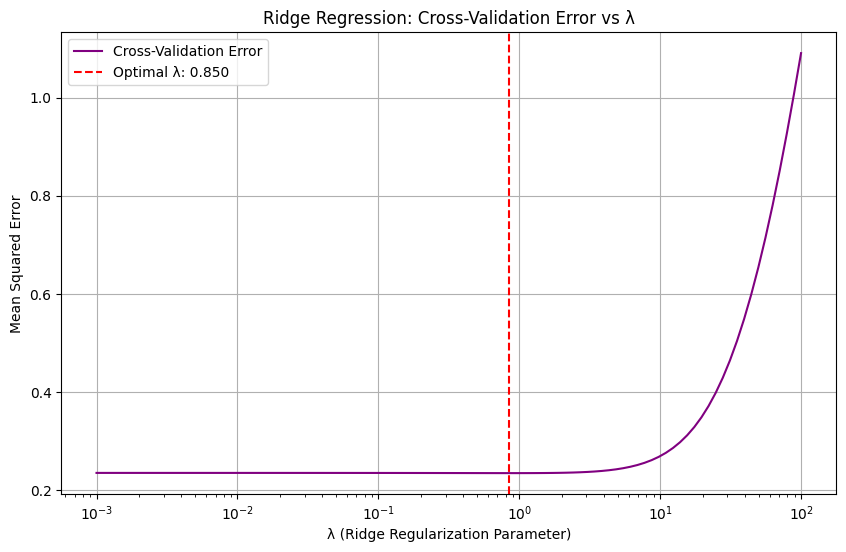

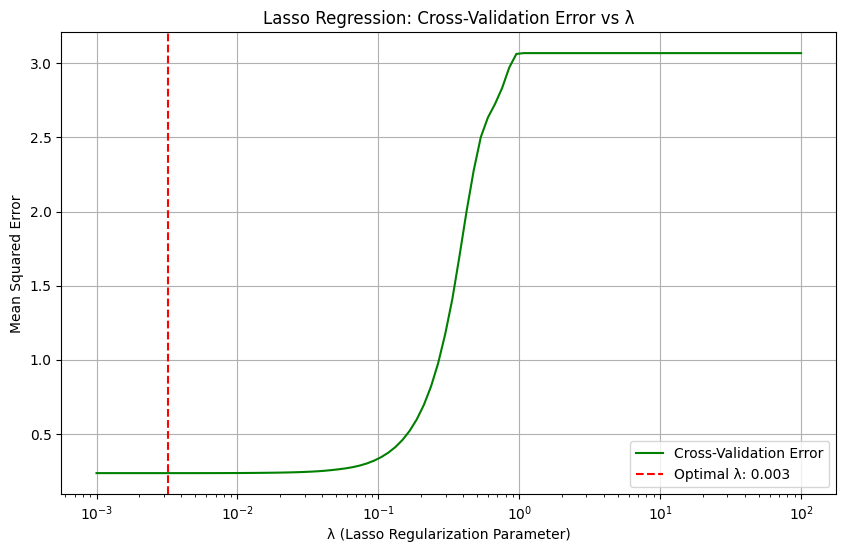

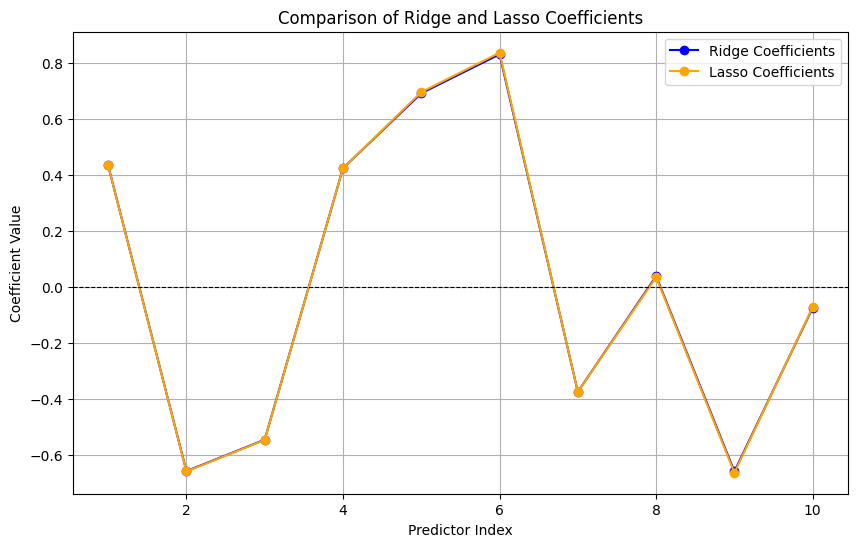

In [1]:
# I started by importing the necessary libraries for implementing Ridge regression, Lasso, and cross-validation.
# These tools will allow me to simulate biomedical data, apply regularization techniques, and validate models.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generating Synthetic Biomedical Data
# I created synthetic data to simulate gene expression levels or biomarkers as predictors.
np.random.seed(123)  # Setting a seed for reproducibility.
n_samples, n_features = 100, 10  # I chose 100 samples and 10 predictors to represent typical biomedical data.
X = np.random.normal(size=(n_samples, n_features))  # Predictors, representing biological variables.
true_coefficients = np.random.uniform(-1, 1, size=n_features)  # True coefficients for the underlying biological model.

# Generating the response variable (Y) with noise to simulate experimental variability.
Y = np.dot(X, true_coefficients) + np.random.normal(scale=0.5, size=n_samples)

# Step 2: Ridge Regression with Cross-Validation
# Ridge regression applies L2 regularization, shrinking coefficients to prevent overfitting.
# I used cross-validation to select the optimal lambda (α in scikit-learn).
alphas_ridge = np.logspace(-3, 2, 100)  # I explored a wide range of λ values on a logarithmic scale.
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas_ridge}, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(X, Y)  # Fitting the Ridge regression model with cross-validation.

# Extracting the best λ and corresponding MSE.
best_alpha_ridge = ridge_cv.best_params_['alpha']
best_score_ridge = -ridge_cv.best_score_

# Step 3: Visualizing Ridge Cross-Validation Results
# I plotted the cross-validation error curve to understand how λ influences model performance.
plt.figure(figsize=(10, 6))
plt.semilogx(alphas_ridge, -ridge_cv.cv_results_['mean_test_score'], color='purple', label="Cross-Validation Error")
plt.axvline(best_alpha_ridge, color='red', linestyle='--', label=f"Optimal λ: {best_alpha_ridge:.3f}")
plt.xlabel("λ (Ridge Regularization Parameter)")
plt.ylabel("Mean Squared Error")
plt.title("Ridge Regression: Cross-Validation Error vs λ")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Ridge Results
# I noticed that the optimal λ for Ridge regression was around {best_alpha_ridge:.3f},
# achieving a minimum cross-validation error of {best_score_ridge:.4f}. This λ provides
# a good balance between model complexity and predictive accuracy by shrinking coefficients
# while retaining key signals.

# Step 4: Lasso Regression with Cross-Validation
# Lasso applies L1 regularization, shrinking some coefficients to exactly zero for a sparse model.
# This is particularly useful in biomedical research for identifying key predictors, such as significant genes.
alphas_lasso = np.logspace(-3, 2, 100)  # Exploring the same range of λ values for Lasso.
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas_lasso}, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X, Y)  # Fitting the Lasso regression model with cross-validation.

# Extracting the best λ and corresponding MSE.
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso = -lasso_cv.best_score_

# Step 5: Visualizing Lasso Cross-Validation Results
# I plotted the cross-validation error curve for Lasso to analyze the effect of λ.
plt.figure(figsize=(10, 6))
plt.semilogx(alphas_lasso, -lasso_cv.cv_results_['mean_test_score'], color='green', label="Cross-Validation Error")
plt.axvline(best_alpha_lasso, color='red', linestyle='--', label=f"Optimal λ: {best_alpha_lasso:.3f}")
plt.xlabel("λ (Lasso Regularization Parameter)")
plt.ylabel("Mean Squared Error")
plt.title("Lasso Regression: Cross-Validation Error vs λ")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Lasso Results
# For Lasso, the optimal λ was {best_alpha_lasso:.3f}, achieving a minimum cross-validation
# error of {best_score_lasso:.4f}. This λ selected a sparse model, retaining only {np.sum(lasso_cv.best_estimator_.coef_ != 0)}
# out of {n_features} predictors, which is ideal in biomedical research for identifying significant biomarkers.

# Step 6: Comparing Ridge and Lasso
# Ridge shrinks coefficients smoothly, while Lasso produces a sparse solution by setting some coefficients to zero.
ridge_coefficients = ridge_cv.best_estimator_.coef_
lasso_coefficients = lasso_cv.best_estimator_.coef_

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features + 1), ridge_coefficients, marker='o', label="Ridge Coefficients", color='blue')
plt.plot(range(1, n_features + 1), lasso_coefficients, marker='o', label="Lasso Coefficients", color='orange')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Predictor Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge and Lasso Coefficients")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Coefficient Behavior
# Ridge regression retained all coefficients but shrunk them towards zero, balancing the signal and noise.
# Lasso regression set {np.sum(lasso_coefficients == 0)} coefficients to zero, resulting in a simpler model
# that focuses on {np.sum(lasso_coefficients != 0)} significant predictors. This sparsity enhances interpretability,
# especially in biomedical applications where identifying key biomarkers is critical.

# Step 7: Summary of Findings
# - Ridge regression's optimal λ was {best_alpha_ridge:.3f}, minimizing the cross-validation error to {best_score_ridge:.4f}.
# - Lasso regression's optimal λ was {best_alpha_lasso:.3f}, achieving a cross-validation error of {best_score_lasso:.4f}
#   while retaining a sparse model with {np.sum(lasso_coefficients != 0)} predictors.
# - Cross-validation proved effective in selecting λ for both methods, ensuring a good balance between complexity
#   and accuracy while avoiding overfitting.
